<a href="https://colab.research.google.com/github/cscholles/GoogleAnalytics-Pandas-Sheet/blob/master/Exerc%C3%ADcio_3_Bootcamp_IGTI_Dataset_IRIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Machine Learning com o Conjunto de dados IRIS

O conjunto de dados IRIS talvez seja o mais clássico dos conjuntos de testes de algoritmos de classificação. Ele divide amostras de plantas em três espécies diferentes e tem, como features, a altura e largura de duas partes da planta: a sépala e as pétalas.

*EXERCÍCIO DO BOOTCAMP:* Neste trabalho você deve classificar esse conjunto de dados com pelo menos dois algoritmos. Você deverá analisá-los segundo as métricas de qualidade que julgar relevantes, e utilizar técnicas de busca de hiperparâmetros e validação cruzada para tornar seus resultados mais robustos.

Fonte: http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html


##Explicação sobre o dataset: 
O conjunto de dados Iris é um conjunto de dados clássico para classificação, aprendizado de máquina e visualização de dados.

O conjunto de dados contém: 3 classes (diferentes espécies de íris) com 50 amostras cada e quatro propriedades numéricas sobre essas classes: Comprimento da sépala, Largura da sépala, Comprimento da pétala e Largura da pétala.

Uma espécie, Iris Setosa, é "linearmente separável" das outras duas. Isso significa que podemos desenhar uma linha (ou um hiperplano em espaços de maior dimensão) entre amostras de Iris Setosa e amostras correspondentes às outras duas espécies.

Atributo previsto: Diferentes espécies da planta íris.

Imagens das espécies de flores para referência:

![alt text](https://carolinescholles.com/content/images/2020/06/petal.png)

#Código inicial


In [1]:
from sklearn import datasets
from sklearn.decomposition import PCA
iris = datasets.load_iris()
X = iris.data[:, :2] # pegamos as primeiras duas features aqui. (Sepal Lenght in cm and sepal width in cm)
y = iris.target
y[0] # classe do primeiro elemento
X[:1, :] # primeiro elemento a classificar


array([[5.1, 3.5]])

In [2]:
print(iris.feature_names) #Features elemento X
print(iris.target_names)
print(iris.target) #classe do primeiro elemento Y. São 3 classes: 0 = setosa, 1 = versicolor, 2 = virginica

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Pelo dataset, é possível ver que estamos lidando com um problema de classificação. Estamos prevendo uma resposta (outcome, label ou variável dependente) categórica.

Outra previsão possível seria a regressão, mas não serve para esse caso pois a resposta teria que ser ordenada e contínua.

In [3]:
print(type(iris.data))
print(type(iris.target))
print(iris.data.shape)
print(iris.target.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(150, 4)
(150,)


#Análise Exploratória com Pandas

In [4]:
import pandas as pd #importar pandas
import numpy as np

df=pd.DataFrame(data= np.c_[iris['data'], iris['target']], #criar df
                 columns= iris['feature_names'] + ['target'])

df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sepal length (cm)  150 non-null    float64 
 1   sepal width (cm)   150 non-null    float64 
 2   petal length (cm)  150 non-null    float64 
 3   petal width (cm)   150 non-null    float64 
 4   target             150 non-null    float64 
 5   species            150 non-null    category
dtypes: category(1), float64(5)
memory usage: 6.2 KB


In [6]:
df.shape

(150, 6)

In [7]:
df.isnull().sum() #não temos valores nulos

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
species              0
dtype: int64

In [8]:
df.describe() #entendendo os valores do df de forma estatística

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [9]:
df['species'].value_counts() #ver quantidade de espécies

virginica     50
versicolor    50
setosa        50
Name: species, dtype: int64

#Visualização de Dados

In [10]:
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Análise de correlação: qual o tipo de relação entre as métricas?

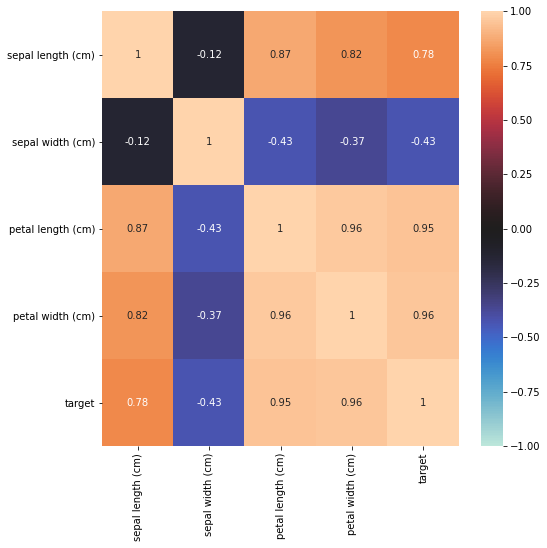

In [11]:
plt.figure(figsize=(8, 8))
matriz_de_correlação = df.corr()  #construindo a matriz de correlação
sns.heatmap(matriz_de_correlação, annot=True,vmin=-1, vmax=1,center= 0)  #plotando a matriz de correlação com o seaborn
plt.show()

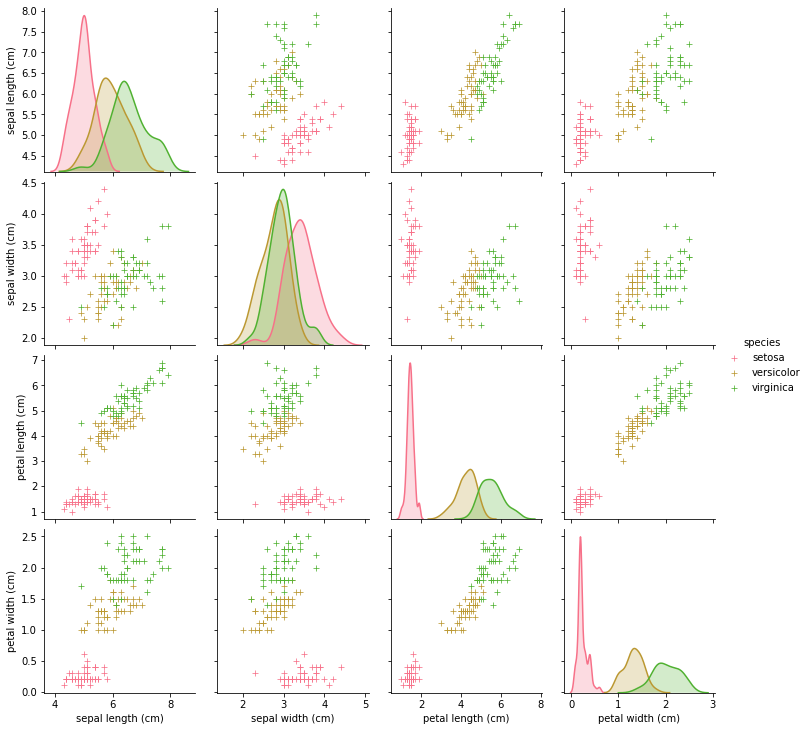

In [12]:
tmp = df.drop('target', axis=1)
g = sns.pairplot(tmp, hue='species', markers='+')
plt.show()

Em relação às outras espécies, setosa foge um pouco do padrão. O cumprimento da sépala é maior, enquanto a largura da pétala é bem menor do que das outras espécies.

#Aplicação de algoritmos

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 

In [14]:
X_train.shape

(105, 2)

#Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier
floresta = RandomForestClassifier(max_depth=10, random_state=1)
floresta.fit(X_train, y_train)
acuracia = floresta.score(X_test, y_test)
print('Acurácia da RF: ',acuracia)

Acurácia da RF:  0.7111111111111111


#K-Nearest Neighbors

In [22]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=3) 
KNN.fit(X_train, y_train)
acuracia = KNN.score(X_test, y_test)
print('Acurácia do KNN: ',acuracia)

Acurácia do KNN:  0.6666666666666666


#Validação Cruzada

In [25]:
from sklearn.model_selection import cross_val_score
cv_floresta = cross_val_score(floresta, X, y)
cv_knn = cross_val_score(KNN, X, y)

print('\nValidação cruzada: {0} vs {1}'.format(cv_knn, cv_floresta))


Validação cruzada: [0.66666667 0.8        0.63333333 0.86666667 0.66666667] vs [0.7        0.73333333 0.7        0.76666667 0.76666667]


In [29]:
#Validação random forest
sum_cv_floresta = 0
for cv_score in cv_floresta:
  sum_cv_floresta += cv_score

  print('\nResultado random forest: {0}'.format(sum_cv_floresta/5))


Resultado random forest: 0.13999999999999999

Resultado random forest: 0.2866666666666666

Resultado random forest: 0.4266666666666666

Resultado random forest: 0.5799999999999998

Resultado random forest: 0.7333333333333332


In [30]:
#Validação KNN
sum_cv_knn = 0
for cv_score in cv_knn:
  sum_cv_knn += cv_score

  print('\nResultado KNN: {0}'.format(sum_cv_knn/5))



Resultado KNN: 0.13333333333333333

Resultado KNN: 0.29333333333333333

Resultado KNN: 0.42000000000000004

Resultado KNN: 0.5933333333333334

Resultado KNN: 0.7266666666666667


#Buscando Hiper Parâmetros

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
#RFC

In [ ]:
#KNN